In [35]:
import pandas as pd

In [36]:
df = pd.read_csv('cookie_cats.csv')

In [37]:
df.head()

,userid,version,sum_gamerounds,retention_1,retention_7
0,116,gate_30,3,False,False
1,337,gate_30,38,True,False
2,377,gate_40,165,True,False
3,483,gate_40,1,False,False
4,488,gate_40,179,True,True


## Checking missing values 

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90189 entries, 0 to 90188
Data columns (total 5 columns):
userid            90189 non-null int64
version           90189 non-null object
sum_gamerounds    90189 non-null int64
retention_1       90189 non-null bool
retention_7       90189 non-null bool
dtypes: bool(2), int64(2), object(1)
memory usage: 2.2+ MB


There are no missing values in this dataset. 

## Count the number of players in each group

In [39]:
df.groupby('version').count()

,userid,sum_gamerounds,retention_1,retention_7
version,,,,
gate_30,44700,44700,44700,44700
gate_40,45489,45489,45489,45489


When a player installed the game he/she was random;y assigned one of the two gates; 30 or 40. 
Thankfully each group is split pretty eavenly almost 50/50.

## Analyzing player behavior 

The fist step of analyzing player behavior begins with plotting a boxplot to visualize the distribution of 'sum_gamerounds', which would give us a rough idea of how many game rounds were played by a player during the first week after installing the game.

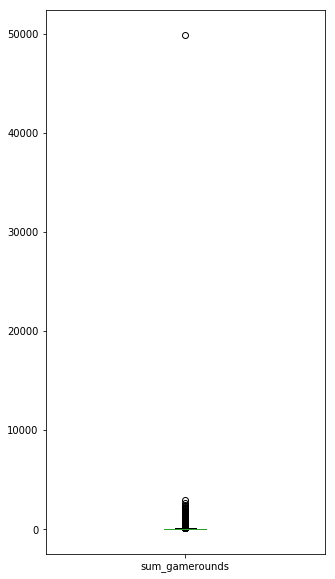

In [40]:
df['sum_gamerounds'].plot.box(figsize=(5,10))

There is clearly an outlier here, this player played 50,000 games in the first week after installing the game.
Due to this outlier, the boxplot is extremely skewed and thus not infomative for our needs. 

To learn about the behavior of the majority of players we'll turn to percentages. 

In [41]:
df['sum_gamerounds'].describe()

count    90189.000000
mean        51.872457
std        195.050858
min          0.000000
25%          5.000000
50%         16.000000
75%         51.000000
max      49854.000000
Name: sum_gamerounds, dtype: float64

In [42]:
#counting the number of players for each of the gamerounds 
plot_df = df.groupby('sum_gamerounds')['userid'].count()
plot_df

sum_gamerounds
0        3994
1        5538
2        4606
3        3958
4        3629
5        2992
6        2861
7        2379
8        2267
9        2013
10       1752
11       1654
12       1570
13       1594
14       1519
15       1446
16       1342
17       1269
18       1228
19       1158
20       1033
21       1032
22        934
23        879
24        794
25        792
26        689
27        723
28        662
29        613
         ... 
1457        1
1462        1
1469        1
1490        1
1491        1
1522        1
1528        1
1529        1
1544        1
1558        1
1559        1
1573        1
1643        2
1667        1
1687        1
1697        1
1705        1
1714        1
1816        1
1906        1
2015        1
2063        1
2124        1
2156        1
2251        1
2294        1
2438        1
2640        1
2961        1
49854       1
Name: userid, Length: 942, dtype: int64

In the above output data, the first column is the number of rounds a player played. And the second column is the number of players in total played that amout of rounds. As we can see from the above output data about 50% of the players played fewer than 16 rounds during the first week after installation, and 75% fewer than 51 rounds. 

NEarly 4000 players did not even play a single round, some reasons for this might include 

- They downloaded a number of new games at the same time and were attracted and distracted by other games. Basically their attention was grabbed by something else. 
- They opened the app but did not like the design/interface/music. so quit before even playing the game
- They haven't even started a game yet.

Another number worth our attention is that more than 14,000 players played fewer than three rounds. For these player, the reasons for leaving may include:

- They didn't enjoy the game. (probably the most common reason)
- The game turned out to be different than what they expected
- The game was too easy and they got bored of it. 

Over all at this point, it's important to understand why a large number of players quit the game at an early stage. Tactile entertainment can try to collect player feedback, through in-app surveys, but that's virtually all we can do about this at the moment. 

In [43]:
# plotting the distribution of players that played 0 to 100 game rounds during their first weeek playing the game. 
%matplotlib inline

Text(0.5,0,'# Game rounds')

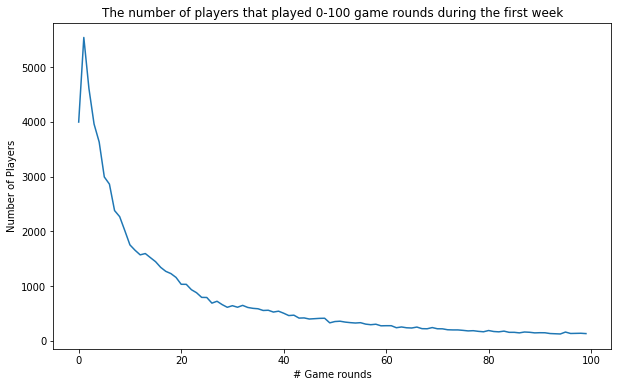

In [44]:
ax = plot_df[:100].plot(figsize=(10,6))
ax.set_title("The number of players that played 0-100 game rounds during the first week")
ax.set_ylabel('Number of Players')
ax.set_xlabel('# Game rounds')

As you can see the distribution is highly skewed, with a long tail on the right. A huge number of players played fewer than 20 rounds and left the game. For rounds greater than 60, the number of players stayed steady at about 300. #estimating/eyeballing it right here
#need to figure out how to segment out ranges that I find interesting

## Part 4. Comparing 1-day retention

A common metric in the video gaming industry for how fun a game is 1-day retiention: the percentage of players that comes back and plays the game one day after they have installed it. The higher the 1-day retention is, hte easier it is to retain players and build a large player base. 

Overall one-day retention 

In [45]:
df['retention_1'].sum() / df['retention_1'].count()

# When using .sum(), T/F will first be converted to 1/0.

0.4452095044850259

Multipy by 100 and we get 44.52% of players come back one day after installing the game. Now that we have a benchmark, let's look at how 1-day retention differs betweem the two AB-groups. 

In [46]:
df.groupby('version')['retention_1'].mean()

version
gate_30    0.448188
gate_40    0.442283
Name: retention_1, dtype: float64

It appears that there was a slight decrease in 1-day retention when the gate was moved to level 40(44.2%) compated to the control when it was at level 30(44.8%). It's a small change, but even small changes in retention can have a large impack. But while we are certain od the difference in the data, how certain should we be that a gate at level 40 will give us an indication of how uncertain the retention numbers are.

Bootstrapping: Should we be confident in hte difference?

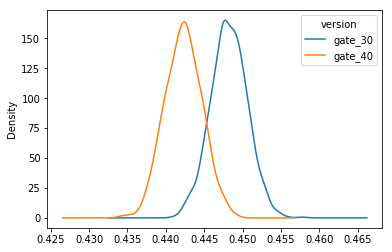

In [69]:
# Creating a list with bootstrapped means for each A/B-group
%matplotlib inline
boot_1d = []
for i in range(1000):
    boot_mean = df.sample(frac = 1,replace = True).groupby('version')['retention_1'].mean()
    boot_1d.append(boot_mean)
    #This above code took ofever to fix, i basically know that icannot indent a line of code

# Transforming the list to a Dataframe

boot_1d = pd.DataFrame(boot_1d)
                        
#A Kernel Density Estimate plot of hte bootstrap distributions

boot_1d.plot(kind='density')

#Would be explaination if it were possible for me to complete this plot

The two distridubtions above represent the bootstrap uncertainty over what the underlying 1-day retention could be for the teo AB-groups. 

There seems to be some evidence of a difference, albeitsmall. Let's plot the % difference to have a closer look.

Probability that 1-day retention is greater when the gate is at level 30: 0.965


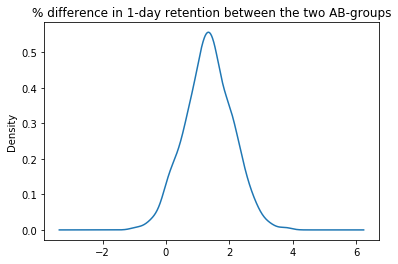

In [70]:
# And now we are adding a column with the % difference between the two AB-groups 
%matplotlib inline
boot_1d['diff'] =(boot_1d.gate_30 - boot_1d.gate_40)/boot_1d.gate_40*100

# Ploting the bootstrap % difference

ax = boot_1d['diff'].plot(kind='density')
ax.set_title('% difference in 1-day retention between the two AB-groups')

#Calculating the probability that 1-day retention is greater when the gate is at level 30
print('Probability that 1-day retention is greater when the gate is at level 30:', (boot_1d['diff'] > 0).mean())

From this chart, we can see that the most likely % difference is around 1%-2% change, and that 96% of the distribution in above 0%, in favor of a gate at level 30.

Comparing 7-day Retention

The boostrap analysis tells us that there is a high probability that 1-day retention ...

In [72]:
df.groupby('version')['retention_7'].sum() / df.groupby('version')['retention_7'].count()

version
gate_30    0.190201
gate_40    0.182000
Name: retention_7, dtype: float64

Insights into the code above: 
- Like with the 1-day retention, 7-day retention is slightly lower when the gate is at level 40 (18.2% as you can see above. Than when the gate is at level 30 (a solid 19%).

- This difference is also longer than for 1-day retention, presumably because more palyers have had time ot hit the first gate. 

- The overall 7-day retention is lower than the overall 1-day retention; fewer people play a game a week after installing than a day after installing.

Just as before let us use bootstrapping again to analyze how certain we should be of the difference between AB-groups...

Probability that 7-day retention is greater when the gate is at level 30: 0.998


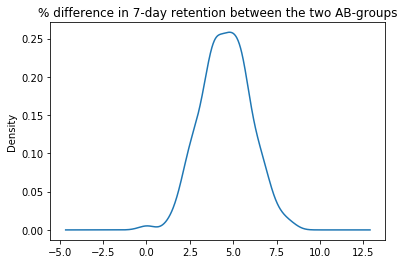

In [83]:
#creating a list with bootstrapped means for each AB group
boot_7d = []
for i in range(500):
    boot_mean = df.sample (frac=1,replace=True).groupby('version')['retention_7'].mean()
    boot_7d.append(boot_mean)
    
# Transforming the list to a DataFrame

boot_7d = pd.DataFrame(boot_7d)

#Adding a column with the % difference between two AB-groups

boot_7d['diff'] = (boot_7d.gate_30 - boot_7d.gate_40)/boot_7d.gate_40*100

#plotting the bootstrap % difference 

ax = boot_7d['diff'].plot(kind='density')
ax.set_title('% difference in 7-day retention between the two AB-groups')

#Calculating the probability that 7-day retention is greater when the gate is at level 30

print('Probability that 7-day retention is greater when the gate is at level 30:',(boot_7d['diff']>0).mean())





## Conclusion

The bootstrap result tells us that there is strong evidence tbat 7-day retention is higher when the gate is at level 30 than when it's at level 40. The conclusion is: If we want to keep retention high - both 1-day and 7-day retention - we should not move the gate from level 30 to level 40. 

So why is retention higher when the gate is positioned earlier? One could expect the opposite: The later the obstacle, the longer people are going ot engage with the game. But this is not what the data tells us. The theort of hedonic adaptation can give us one explaination for this. 

In short, hedonic adaptation is the tendency for people to get less and less enjoyment out of a fun activity over time if that activity is undertaken continuously. When the gate is moved to level 40, fewer players make it far enough, and they are more likely to quit the game because they simply got bored of it. 
